# Predicting Loan Payback / Dự đoán khả năng trả nợ


This project aims to build a machine learning model to predict whether a customer will be able to pay back a loan based on financial and personal attributes.  
(Dự án này nhằm xây dựng một mô hình học máy để dự đoán xem khách hàng có thể trả được khoản vay hay không dựa trên các đặc điểm tài chính và đặc điểm cá nhân.)

## Problem Description / Mô tả bài toán

In this competition, we need to classify whether a customer will successfully pay back a loan.  
Trong cuộc thi này, chúng ta cần phân loại xem khách hàng có thể trả nợ thành công hay không.

- The **train.csv** file contains:
  - Customer features (income, credit history, debt ratio, etc.)
  - A target column: **loan_paid_back**
  
- File **train.csv** chứa:
  - Các đặc trưng của khách hàng (thu nhập, lịch sử tín dụng, tỷ lệ nợ,…)
  - Cột mục tiêu: **loan_paid_back**

- The **test.csv** file contains only the features without the target column.  
- File **test.csv** chỉ chứa các đặc trưng, không có cột mục tiêu.

- The **sample_submission.csv** file shows the required Kaggle submission format.  
- File **sample_submission.csv** cung cấp định dạng nộp bài đúng chuẩn Kaggle.

**Goal / Mục tiêu**  
Train a model using train.csv → predict loan_paid_back for test.csv → create submission.csv to upload to Kaggle.  
(Huấn luyện mô hình với train.csv → dự đoán loan_paid_back cho test.csv → tạo submission.csv để nộp lên Kaggle.)


## Data Description / Mô tả dữ liệu

This section provides detailed explanations of all features in the dataset, including their meaning, type, and how they relate to credit risk prediction.  
(Phần này mô tả chi tiết các thuộc tính trong bộ dữ liệu, bao gồm ý nghĩa, kiểu dữ liệu và mối liên hệ với dự đoán rủi ro tín dụng.)

---

### **1. id**
- **Type:** Index / Identifier  
- **EN:** Unique identifier for each loan record.  
- **VI:** Mã định danh duy nhất cho mỗi khoản vay.  
- **Notes:** Not used for training (drop this column).  

---

### **2. annual_income**
- **Type:** Numerical  
- **EN:** Borrower's yearly income.  
- **VI:** Thu nhập hằng năm của người vay.  
- **Importance:** Higher income generally reduces loan risk.  

---

### **3. debt_to_income_ratio**
- **Type:** Numerical  
- **EN:** Ratio of the borrower’s debt to their income. Lower = better.  
- **VI:** Tỷ lệ giữa tổng nợ và thu nhập. Tỷ lệ càng thấp → rủi ro càng thấp.  
- **Importance:** One of the strongest predictors of creditworthiness.  

---

### **4. credit_score**
- **Type:** Numerical  
- **EN:** Credit bureau score (e.g., FICO). Higher score = less risky.  
- **VI:** Điểm tín dụng từ tổ chức tài chính. Điểm càng cao → ít rủi ro.  
- **Importance:** Core factor for loan approval prediction.

---

### **5. loan_amount**
- **Type:** Numerical  
- **EN:** Total loan amount requested/approved.  
- **VI:** Tổng số tiền vay.  
- **Importance:** Larger loans may carry higher default risk.  

---

### **6. interest_rate**
- **Type:** Numerical (%)  
- **EN:** Annual interest rate applied to the loan.  
- **VI:** Lãi suất hằng năm của khoản vay.  
- **Importance:** Higher interest = borrower may struggle → risk increases.

---

### **7. gender**
- **Type:** Categorical  
- **EN:** Gender of the borrower.  
- **VI:** Giới tính.  
- **Notes:** Usually encoded as Male / Female.  

---

### **8. marital_status**
- **Type:** Categorical  
- **EN:** Borrower's marital status (Single, Married, Divorced).  
- **VI:** Tình trạng hôn nhân (Độc thân, Kết hôn, Ly hôn).  
- **Importance:** Can reflect financial stability patterns.

---

### **9. education_level**
- **Type:** Categorical  
- **EN:** Borrower’s education level (High School, Bachelor, Master, PhD).  
- **VI:** Trình độ học vấn (Cấp 3, Đại học, Thạc sĩ, Tiến sĩ).  
- **Importance:** Higher education often correlates with higher income stability.

---

### **10. employment_status**
- **Type:** Categorical  
- **EN:** Current employment status (Employed, Self-Employed, Unemployed).  
- **VI:** Tình trạng việc làm (Có việc làm, Tự làm, Thất nghiệp).  
- **Importance:** Critical indicator of repayment ability.

---

### **11. loan_purpose**
- **Type:** Categorical  
- **EN:** Purpose of the loan (Car, Education, Home, Medical, etc.).  
- **VI:** Mục đích vay (Mua xe, Học tập, Mua nhà, Y tế, …).  
- **Importance:** Certain purposes are associated with higher or lower risk.

---

### **12. grade_subgrade**
- **Type:** Categorical (Ordered)  
- **EN:** Risk category assigned to loan (A1, A2, B1, B2, ...).  
- **VI:** Mức độ rủi ro được đánh giá bởi tổ chức cho vay (A1, B2, …).  
- **Importance:** Encodes lender’s internal risk ranking → highly predictive.

---

### **13. loan_paid_back (Target)**
- **Type:** Binary  
- **EN:** Target variable indicating whether the loan was successfully paid.  
- **VI:** Nhãn cần dự đoán cho biết khách hàng có trả được nợ hay không.
  - **1:** Loan was paid back  
  - **0:** Borrower defaulted  
- **Role:** This is the label we train the model to predict.

---

These features together represent financial stability, creditworthiness, and risk profiles used to determine loan repayment probability.  
(Những thuộc tính này phản ánh sự ổn định tài chính và rủi ro tín dụng để dự đoán khả năng trả nợ.)


## 1. Data

In [1]:
# Library
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [157]:
# Các bảng màu phân loại
set1_colors = sns.color_palette("Set1")      # Màu đậm, nổi bật
set2_colors = sns.color_palette("Set2")      # Màu nhẹ hơn, hài hòa
set3_colors = sns.color_palette("Set3")      # Nhiều màu pastel

paired_colors = sns.color_palette("Paired")  # Cặp màu bổ sung
pastel1_colors = sns.color_palette("Pastel1")  # Màu nhẹ nhàng
pastel2_colors = sns.color_palette("Pastel2")  # Màu nhẹ nhàng hơn

# Các bảng màu đa dạng
coolwarm_colors = sns.color_palette("coolwarm")  

In [138]:
df = pd.read_csv('train.csv')

In [16]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [17]:
df.tail()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0
593993,593993,48959.52,0.096,752,7707.73,10.31,Male,Married,High School,Employed,Education,B3,1.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


## 2. Data processing

### 2.1 Before EDA

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    593994 non-null  int64   
 1   annual_income         593994 non-null  float64 
 2   debt_to_income_ratio  593994 non-null  float64 
 3   credit_score          593994 non-null  int64   
 4   loan_amount           593994 non-null  float64 
 5   interest_rate         593994 non-null  float64 
 6   gender                593994 non-null  category
 7   marital_status        593994 non-null  category
 8   education_level       593994 non-null  category
 9   employment_status     593994 non-null  category
 10  loan_purpose          593994 non-null  category
 11  grade_subgrade        593994 non-null  category
 12  loan_paid_back        593994 non-null  category
dtypes: category(7), float64(4), int64(2)
memory usage: 31.2 MB


In [368]:
cat = ["gender", "marital_status", "education_level", "employment_status", "loan_purpose","grade_subgrade"]
num = ["loan_amount", "interest_rate", "credit_score", "annual_income", "debt_to_income_ratio"]

In [338]:
df[cat] = df[cat].astype('category')

### 2.2 After EDA

In [139]:
q1 = df["credit_score"].quantile(0.01)
q99 = df["credit_score"].quantile(0.99)

df = df[(df["credit_score"] >= q1) & (df["credit_score"] <= q99)]


In [140]:
q1 = df["loan_amount"].quantile(0.01)

df = df[(df["credit_score"] <= q99)]


In [141]:
q1 = df["interest_rate"].quantile(0.01)
q99 = df["interest_rate"].quantile(0.99)

df = df[(df["interest_rate"] >= q1) & (df["interest_rate"] <= q99)]

## 3. EDA(Exploratory data analyst)

In [15]:
df.describe()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,296996.500000,48212.202976,0.120696,680.916009,15020.297629,12.356345
std,171471.442236,26711.942078,0.068573,55.424956,6926.530568,2.008959
min,0.000000,6002.430000,0.011000,395.000000,500.090000,3.200000
25%,148498.250000,27934.400000,0.072000,646.000000,10279.620000,10.990000
50%,296996.500000,46557.680000,0.096000,682.000000,15000.220000,12.370000
75%,445494.750000,60981.320000,0.156000,719.000000,18858.580000,13.680000
max,593993.000000,393381.740000,0.627000,849.000000,48959.950000,20.990000


In [16]:
df.describe(include='category')


,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
count,593994,593994,593994,593994,593994,593994,593994.0
unique,3,4,5,5,8,30,2.0
top,Female,Single,Bachelor's,Employed,Debt consolidation,C3,1.0
freq,306175,288843,279606,450645,324695,58695,474494.0


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    593994 non-null  int64   
 1   annual_income         593994 non-null  float64 
 2   debt_to_income_ratio  593994 non-null  float64 
 3   credit_score          593994 non-null  int64   
 4   loan_amount           593994 non-null  float64 
 5   interest_rate         593994 non-null  float64 
 6   gender                593994 non-null  category
 7   marital_status        593994 non-null  category
 8   education_level       593994 non-null  category
 9   employment_status     593994 non-null  category
 10  loan_purpose          593994 non-null  category
 11  grade_subgrade        593994 non-null  category
 12  loan_paid_back        593994 non-null  category
dtypes: category(7), float64(4), int64(2)
memory usage: 31.2 MB


### Categorical

In [40]:
df['loan_paid_back'].value_counts(normalize=True).reset_index()

,loan_paid_back,proportion
0,1.0,0.79882
1,0.0,0.20118


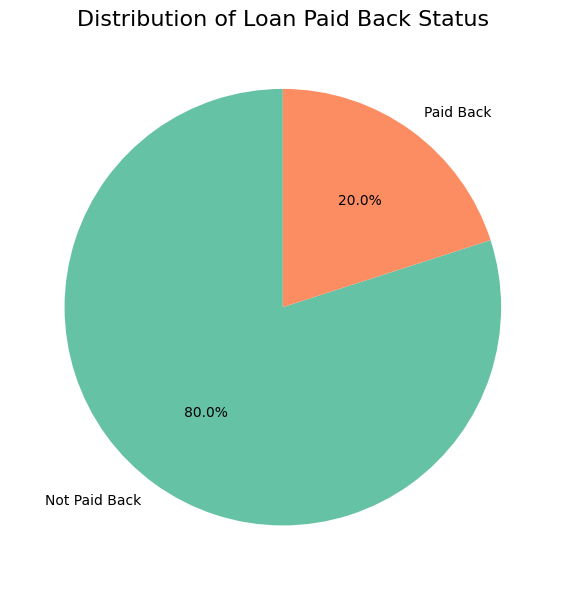

In [158]:
plt.figure(figsize=(10,6))

df['loan_paid_back'].value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',      # Hiển thị phần trăm
    startangle=90,          # Xoay cho đẹp
    colors=set2_colors,     # Bộ màu bạn đã định nghĩa
    labels=['Not Paid Back', 'Paid Back']  # Tuỳ theo 0/1 của bạn
)

plt.title('Distribution of Loan Paid Back Status', fontsize=16)
plt.ylabel("")   
plt.tight_layout()
plt.show()

gender

In [159]:
df['gender'].value_counts(normalize=True).reset_index()

,gender,proportion
0,Female,0.515315
1,Male,0.478402
2,Other,0.006283


In [161]:
df[df['gender']=='Other'].head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
6,6,61574.16,0.042,696,16907.71,13.52,Other,Single,High School,Self-employed,Debt consolidation,C5,1.0
576,576,44610.99,0.180,723,11605.09,11.76,Other,Married,Master's,Unemployed,Other,C2,0.0
876,876,53853.21,0.039,729,13917.19,9.65,Other,Single,Bachelor's,Employed,Other,C2,1.0
1567,1567,70854.31,0.094,581,27602.22,14.74,Other,Single,High School,Retired,Education,E2,1.0
1605,1605,8809.75,0.075,585,25441.75,15.50,Other,Married,Master's,Employed,Debt consolidation,E1,1.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\840331097.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


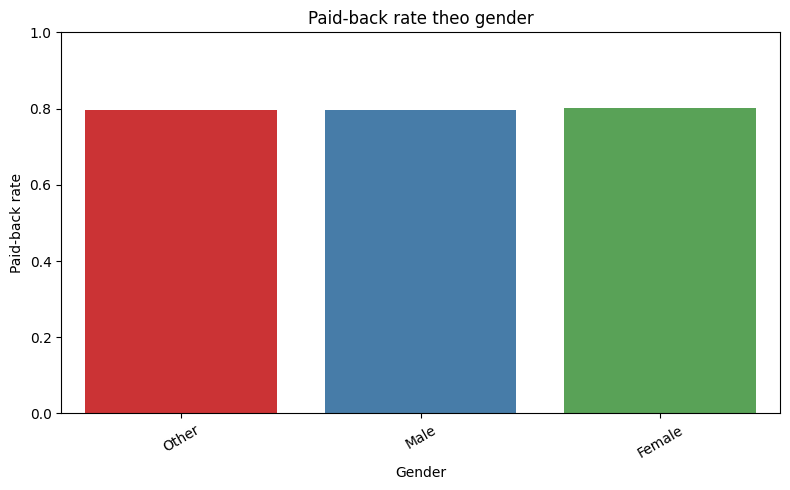

In [162]:
rate = (
    df.groupby("gender")["loan_paid_back"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rate.index,
    y=rate.values,
    palette="Set1"
)

plt.ylabel("Paid-back rate")
plt.xlabel("Gender")
plt.title("Paid-back rate theo gender")

plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Bỏ feature này

marital_status

In [18]:
df['marital_status'].value_counts(normalize=True).reset_index()

,marital_status,proportion
0,Single,0.486273
1,Married,0.466737
2,Divorced,0.035879
3,Widowed,0.011111


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\2539602608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


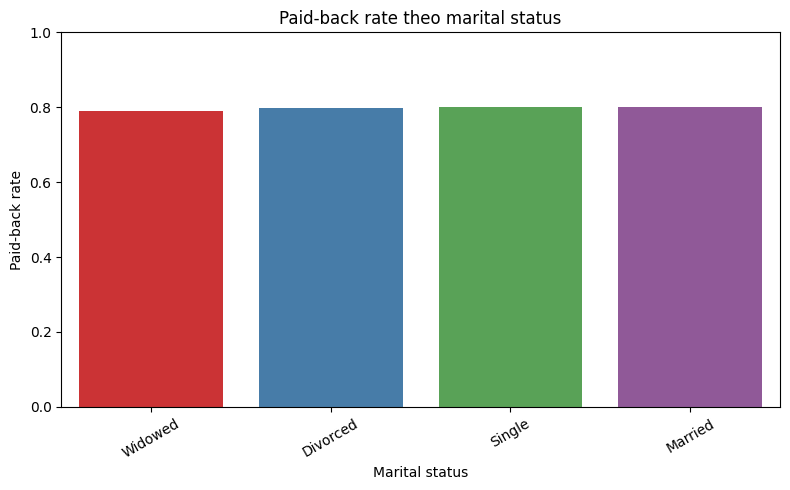

In [152]:
rate = (
    df.groupby("marital_status")["loan_paid_back"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rate.index,
    y=rate.values,
    palette="Set1"
)

plt.ylabel("Paid-back rate")
plt.xlabel("Marital status")
plt.title("Paid-back rate theo marital status")

plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Bỏ martial status

education level

In [32]:
df['education_level'].value_counts(normalize=True).reset_index()

,education_level,proportion
0,Bachelor's,0.470722
1,High School,0.309081
2,Master's,0.156731
3,Other,0.044911
4,PhD,0.018556


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\3393024072.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


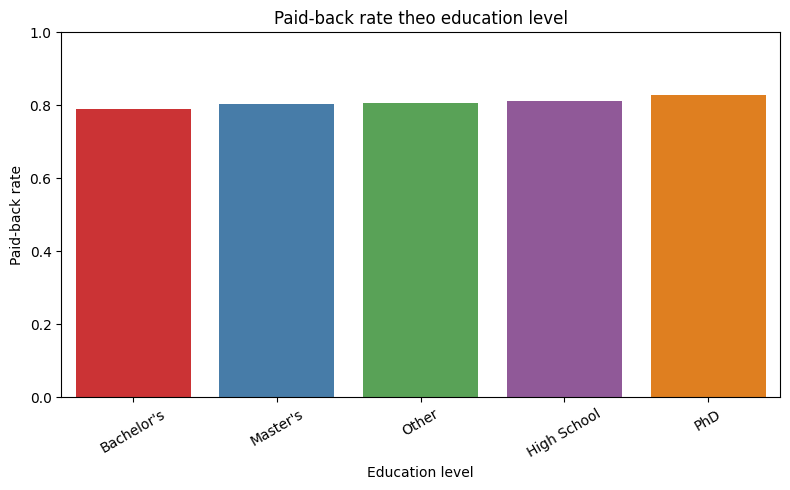

In [151]:
rate = (
    df.groupby("education_level")["loan_paid_back"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rate.index,
    y=rate.values,
    palette="Set1"
)

plt.ylabel("Paid-back rate")
plt.xlabel("Education level")
plt.title("Paid-back rate theo education level")

plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Bỏ feature education level

employment_status

In [34]:
df.employment_status.value_counts(normalize=True).reset_index()

,employment_status,proportion
0,Employed,0.758669
1,Unemployed,0.105195
2,Self-employed,0.088351
3,Retired,0.027699
4,Student,0.020086


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\3959275259.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


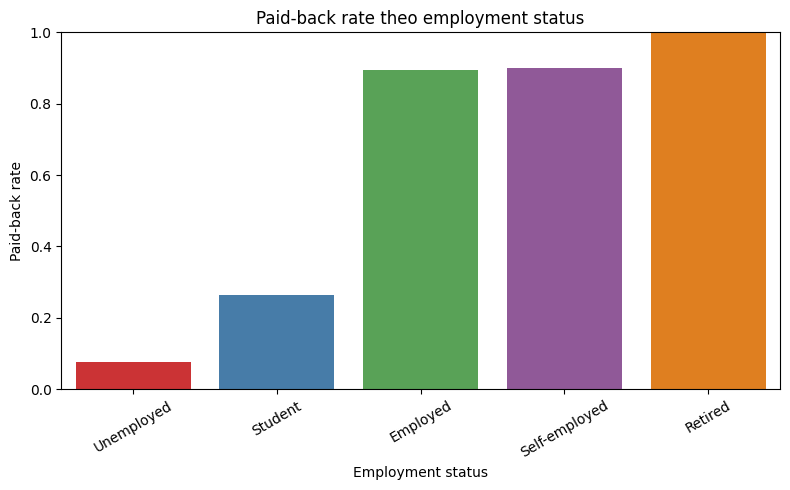

In [148]:
rate = (
    df.groupby("employment_status")["loan_paid_back"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rate.index,
    y=rate.values,
    palette="Set1"
)

plt.ylabel("Paid-back rate")
plt.xlabel("Employment status")
plt.title("Paid-back rate theo employment status")

plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


loan_purpose

In [155]:
df['loan_purpose'].value_counts(normalize=True).reset_index()

,loan_purpose,proportion
0,Debt consolidation,0.546817
1,Other,0.107452
2,Car,0.097823
3,Home,0.074159
4,Education,0.061750
5,Business,0.059447
6,Medical,0.038357
7,Vacation,0.014195


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\2308874901.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


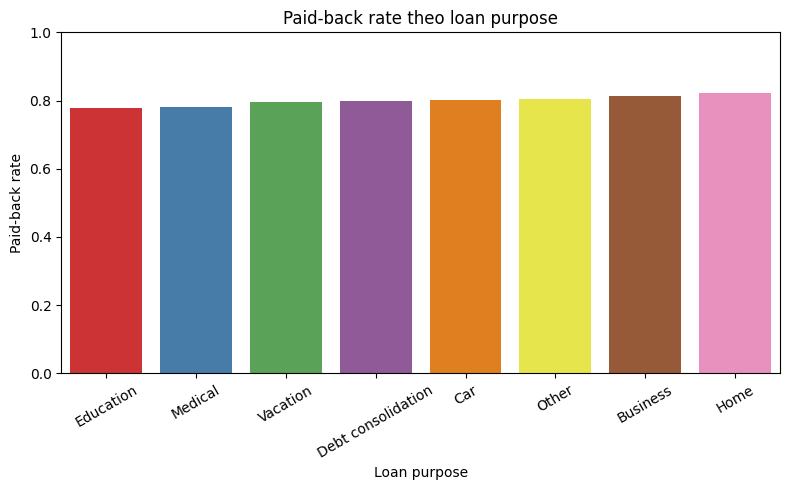

In [150]:
rate = (
    df.groupby("loan_purpose")["loan_paid_back"]
      .mean()
      .sort_values()
)

plt.figure(figsize=(8, 5))
sns.barplot(
    x=rate.index,
    y=rate.values,
    palette="Set1"
)

plt.ylabel("Paid-back rate")
plt.xlabel("Loan purpose")
plt.title("Paid-back rate theo loan purpose")

plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\592375406.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(col)["loan_paid_back"].mean().sort_values()
C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\592375406.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\592375406.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rate = df.groupby(col)["loan_paid_back"].mean().sort_values()
C:\U

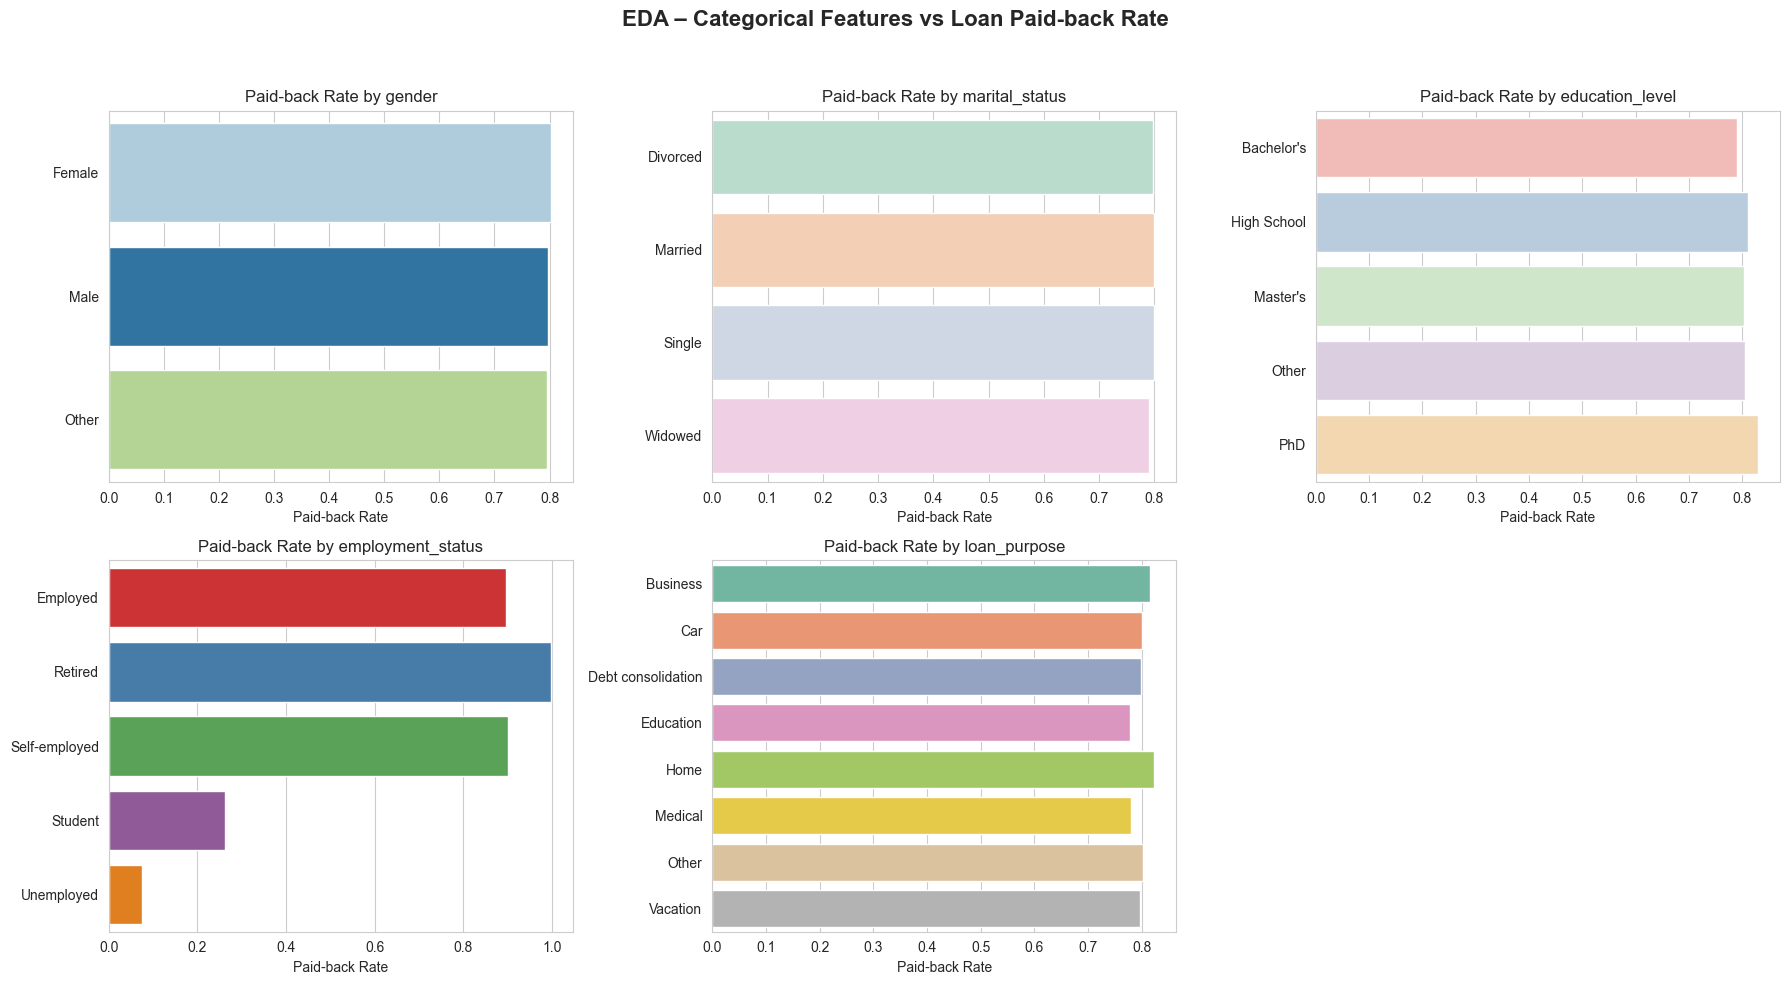

In [343]:
sns.set_style("whitegrid")

# --------- Feature list ---------
cat = [c for c in cat if c != "grade_subgrade"]

# --------- Palette mapping ---------
palette_map = {
    "employment_status": "Set1",      # mạnh → nổi bật
    "loan_purpose": "Set2",
    "education_level": "Pastel1",
    "marital_status": "Pastel2",
    "gender": "Paired"
}

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(cat):
    rate = df.groupby(col)["loan_paid_back"].mean().sort_values()

    sns.barplot(
        x=rate.values,
        y=rate.index,
        ax=axes[i],
        palette=sns.color_palette(palette_map[col], len(rate))
    )

    axes[i].set_title(f"Paid-back Rate by {col}", fontsize=12)
    axes[i].set_xlabel("Paid-back Rate")
    axes[i].set_ylabel("")

# Xóa subplot thừa
for ax in axes[len(cat):]:
    ax.axis("off")

plt.suptitle(
    "EDA – Categorical Features vs Loan Paid-back Rate",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Bỏ feature loan purpose

grade_subgrade

In [ ]:
df['grade_subgrade'].value_counts(normalize=True).sort_index().reset_index()

### Numerical

In [41]:
df['annual_income'].describe().reset_index()

,index,annual_income
0,count,593994.000000
1,mean,48212.202976
2,std,26711.942078
3,min,6002.430000
4,25%,27934.400000
5,50%,46557.680000
6,75%,60981.320000
7,max,393381.740000


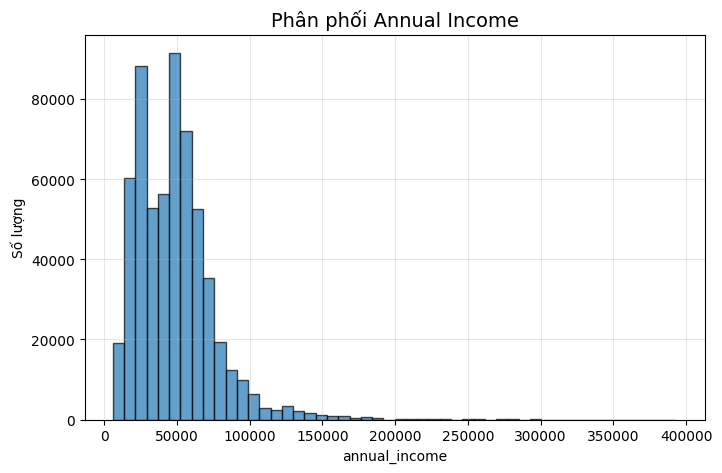

In [56]:
plt.figure(figsize=(8,5))

# log-transform để nhìn phân phối rõ hơn
income_log = df['annual_income']

plt.hist(income_log, bins=50, edgecolor='black', alpha=0.7)

plt.title("Phân phối Annual Income", fontsize=14)
plt.xlabel("annual_income")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)

plt.show()

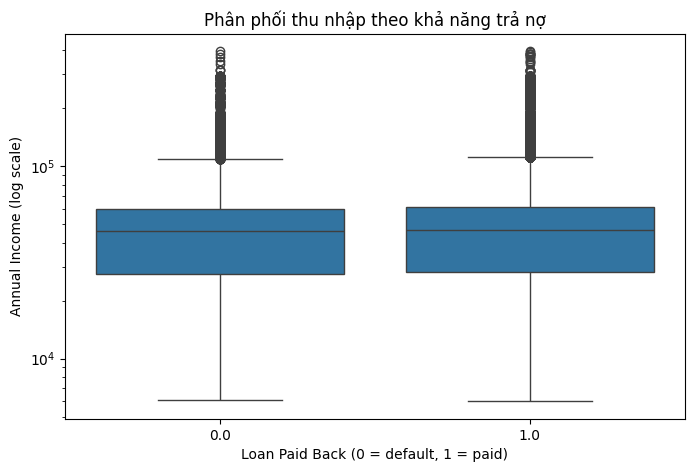

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="loan_paid_back", y="annual_income")
plt.yscale("log")   # rất quan trọng vì income skewed
plt.title("Phân phối thu nhập theo khả năng trả nợ")
plt.xlabel("Loan Paid Back (0 = default, 1 = paid)")
plt.ylabel("Annual Income (log scale)")
plt.show()

Tạo feature khác từ feature này

debt_to_income_ratio

In [52]:
df['debt_to_income_ratio'].describe().reset_index()

,index,debt_to_income_ratio
0,count,593994.000000
1,mean,0.120696
2,std,0.068573
3,min,0.011000
4,25%,0.072000
5,50%,0.096000
6,75%,0.156000
7,max,0.627000


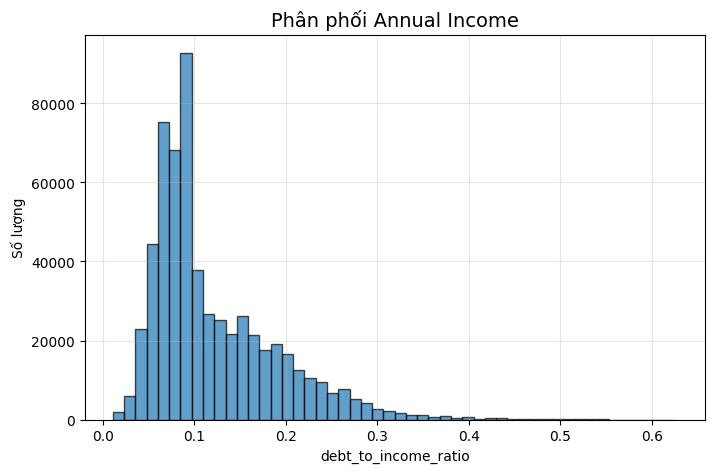

In [53]:
plt.figure(figsize=(8,5))

# log-transform để nhìn phân phối rõ hơn
income_log = df['debt_to_income_ratio']

plt.hist(income_log, bins=50, edgecolor='black', alpha=0.7)

plt.title("Phân phối Annual Income", fontsize=14)
plt.xlabel("debt_to_income_ratio")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)

plt.show()

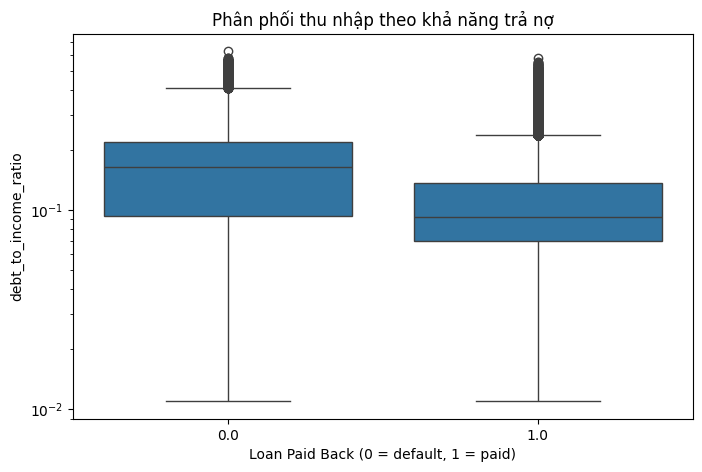

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="loan_paid_back", y="debt_to_income_ratio")
plt.yscale("log")   # rất quan trọng vì income skewed
plt.title("Phân phối thu nhập theo khả năng trả nợ")
plt.xlabel("Loan Paid Back (0 = default, 1 = paid)")
plt.ylabel("debt_to_income_ratio")
plt.show()

credit_score

In [63]:
df.credit_score.describe().reset_index()

,index,credit_score
0,count,593994.000000
1,mean,680.916009
2,std,55.424956
3,min,395.000000
4,25%,646.000000
5,50%,682.000000
6,75%,719.000000
7,max,849.000000


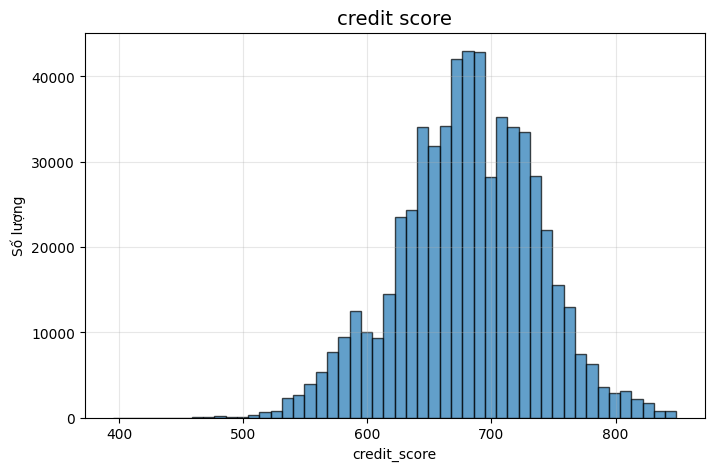

In [65]:
plt.figure(figsize=(8,5))

# log-transform để nhìn phân phối rõ hơn
income_log = df['credit_score']

plt.hist(income_log, bins=50, edgecolor='black', alpha=0.7)

plt.title("credit score", fontsize=14)
plt.xlabel("credit_score")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)

plt.show()

C:\Users\Quang Trung\AppData\Local\Temp\ipykernel_12148\445159403.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


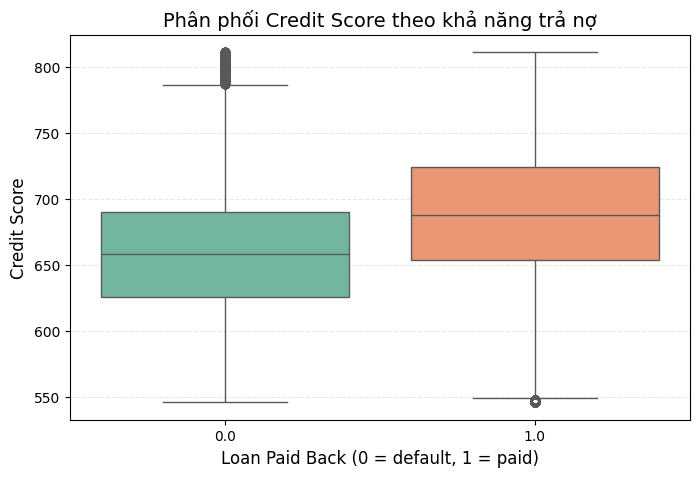

In [69]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="loan_paid_back",
    y="credit_score",
    palette="Set2"
)

plt.title("Phân phối Credit Score theo khả năng trả nợ", fontsize=14)
plt.xlabel("Loan Paid Back (0 = default, 1 = paid)", fontsize=12)
plt.ylabel("Credit Score", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


loan_amount 

In [71]:
df.loan_amount.describe().reset_index()

,index,loan_amount
0,count,582442.000000
1,mean,15021.189740
2,std,6925.665119
3,min,500.090000
4,25%,10279.820000
5,50%,15000.110000
6,75%,18848.100000
7,max,48959.950000


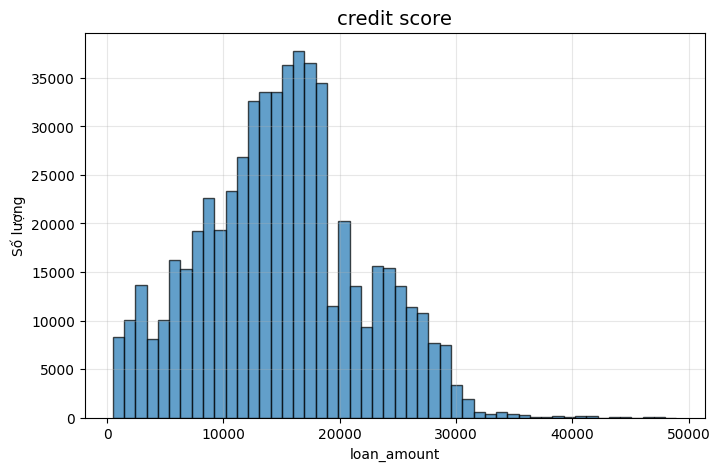

In [72]:
plt.figure(figsize=(8,5))

# log-transform để nhìn phân phối rõ hơn
income_log = df['loan_amount']

plt.hist(income_log, bins=50, edgecolor='black', alpha=0.7)

plt.title("credit score", fontsize=14)
plt.xlabel("loan_amount")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)

plt.show()

C:\Users\Quang Trung\AppData\Local\Temp\ipykernel_12148\651876577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


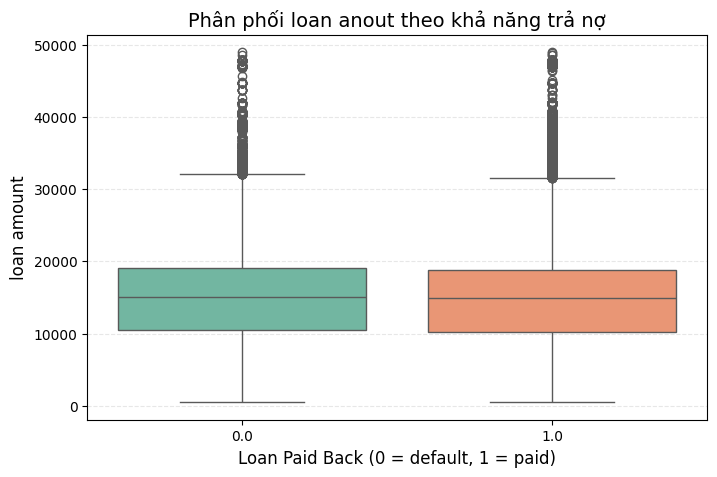

In [75]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="loan_paid_back",
    y="loan_amount",
    palette="Set2"
)

plt.title("Phân phối loan anout theo khả năng trả nợ", fontsize=14)
plt.xlabel("Loan Paid Back (0 = default, 1 = paid)", fontsize=12)
plt.ylabel("loan amount", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


interest_rate

In [76]:
df['interest_rate'].describe().reset_index()

,index,interest_rate
0,count,582442.000000
1,mean,12.353079
2,std,1.969544
3,min,3.200000
4,25%,11.020000
5,50%,12.370000
6,75%,13.660000
7,max,20.990000


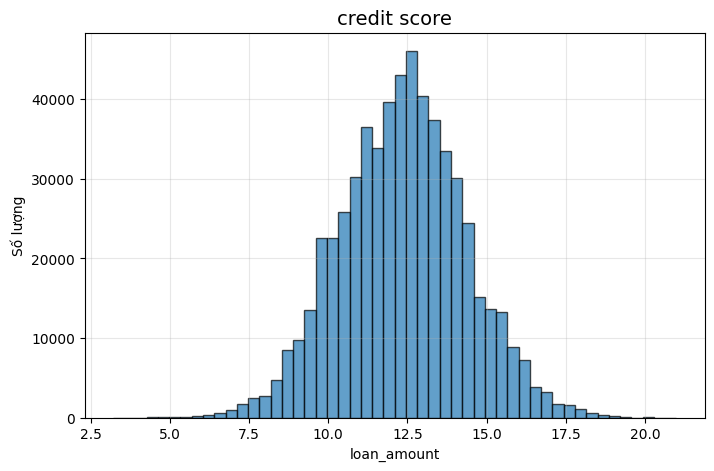

In [9]:
plt.figure(figsize=(8,5))

# log-transform để nhìn phân phối rõ hơn
income_log = df['interest_rate']

plt.hist(income_log, bins=50, edgecolor='black', alpha=0.7)

plt.title("credit score", fontsize=14)
plt.xlabel("loan_amount")
plt.ylabel("Số lượng")
plt.grid(alpha=0.3)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_6548\2411861300.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


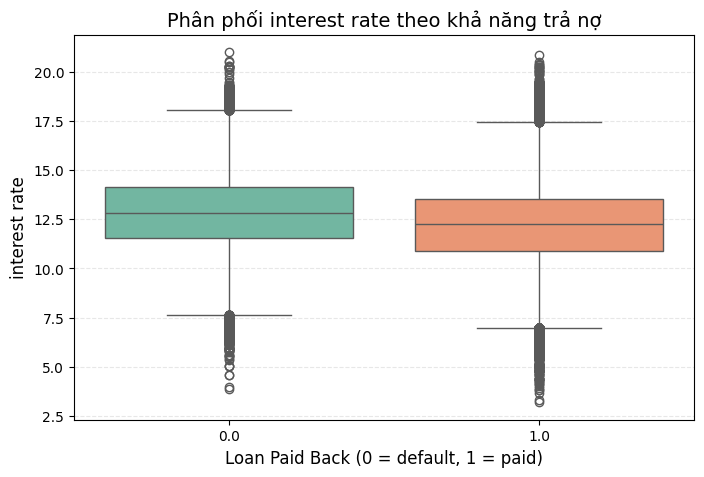

In [11]:
plt.figure(figsize=(8,5))

sns.boxplot(
    data=df,
    x="loan_paid_back",
    y="interest_rate",
    palette="Set2"
)

plt.title("Phân phối interest rate theo khả năng trả nợ", fontsize=14)
plt.xlabel("Loan Paid Back (0 = default, 1 = paid)", fontsize=12)
plt.ylabel("interest rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()


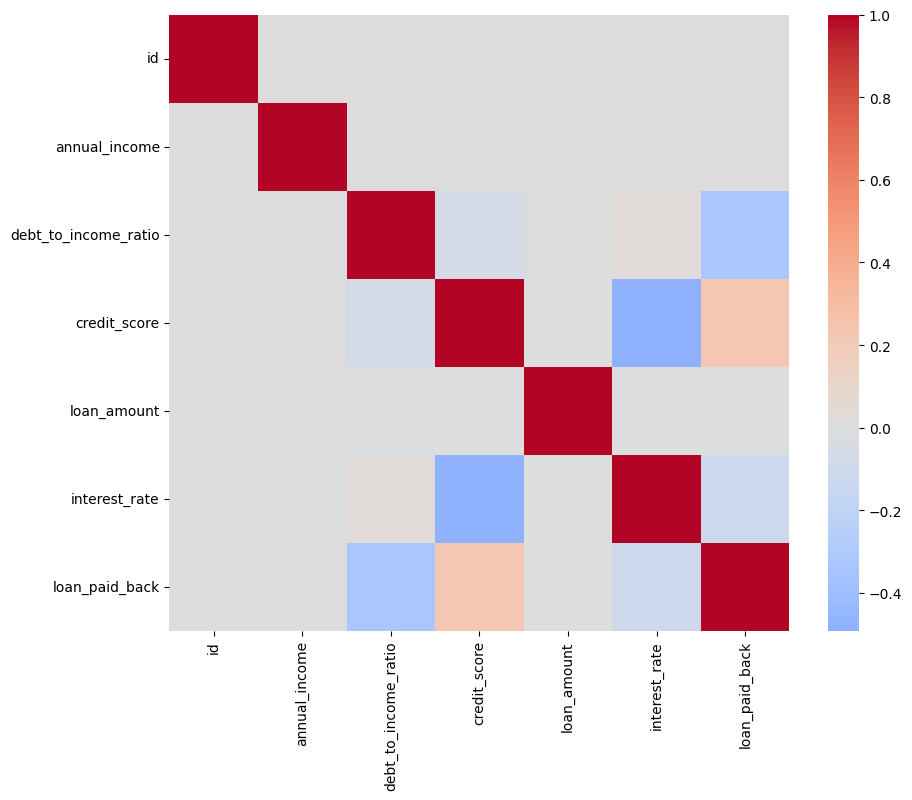

In [147]:
num_df = df.select_dtypes(include=["int64", "float64", "float32"])

plt.figure(figsize=(10, 8))
sns.heatmap(
    num_df.corr(),
    cmap="coolwarm",
    center=0
)
plt.show()


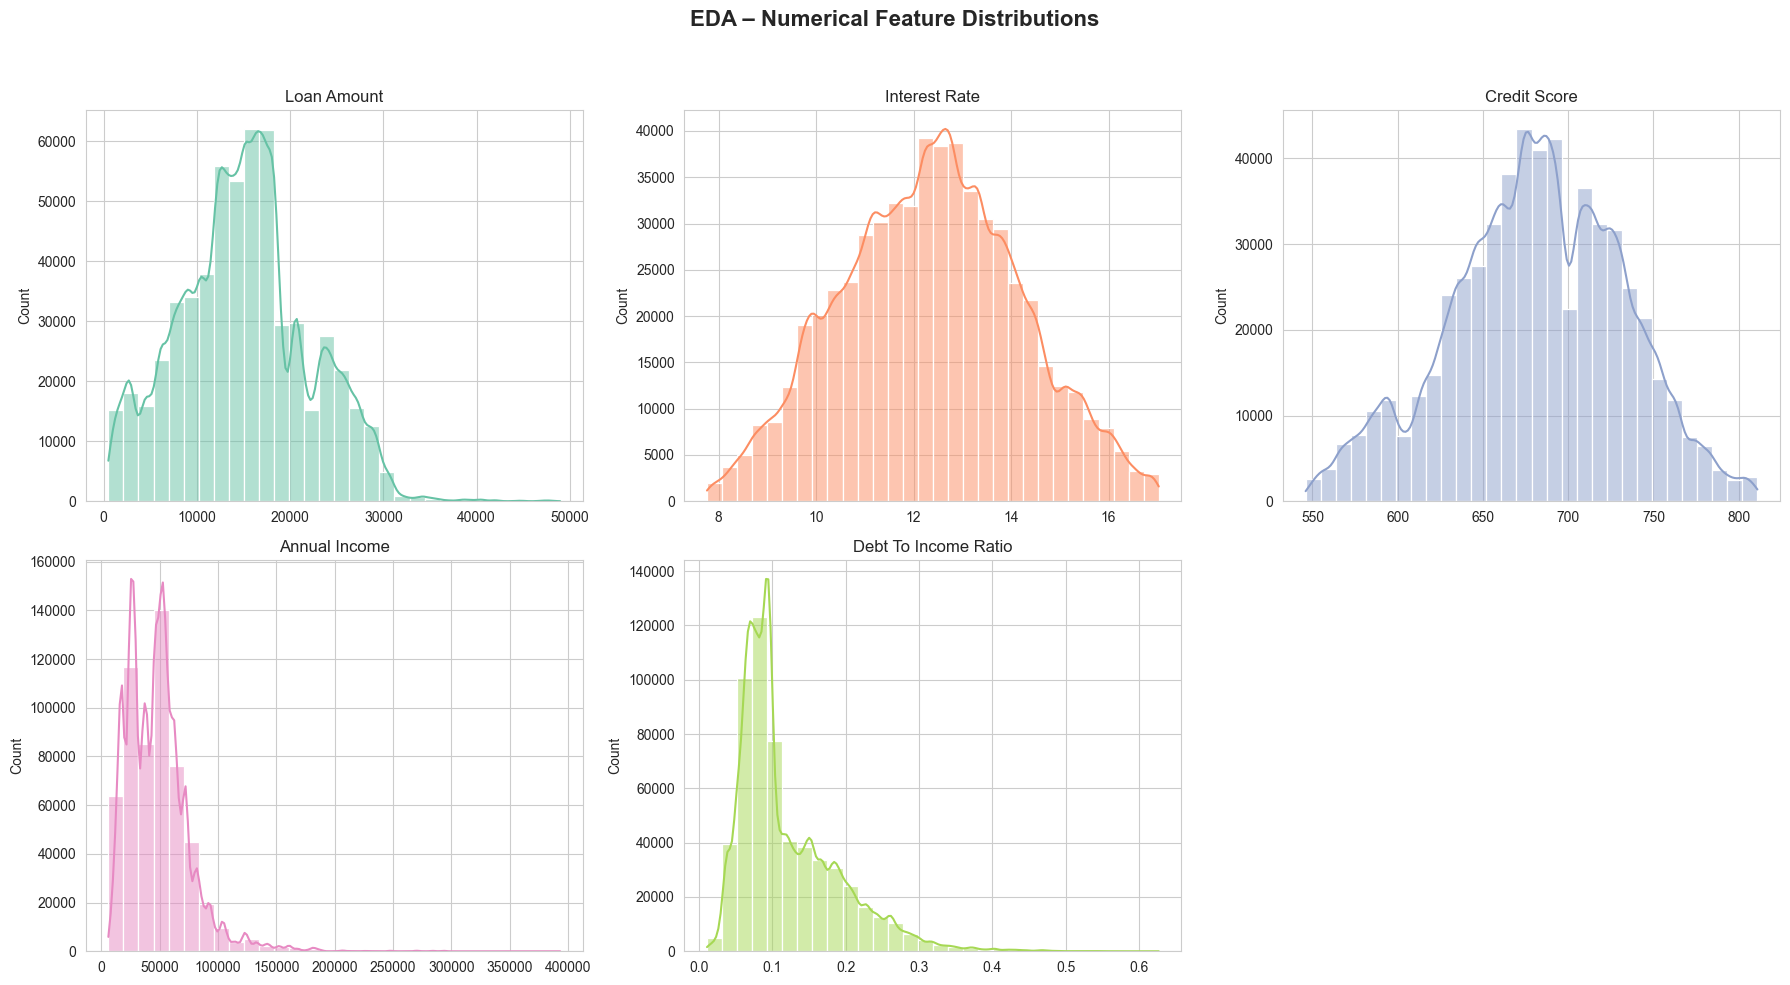

In [369]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num):
    sns.histplot(
        df[col],
        bins=30,
        kde=True,
        ax=axes[i],
        color=sns.color_palette("Set2")[i % 8]
    )

    axes[i].set_title(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Tắt subplot thừa (nếu có)
for ax in axes[len(num):]:
    ax.axis("off")

plt.suptitle(
    "EDA – Numerical Feature Distributions",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\4117445572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\4117445572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\4117445572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Dell\AppData\Local\Temp\ipykernel_22196\4117445572.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

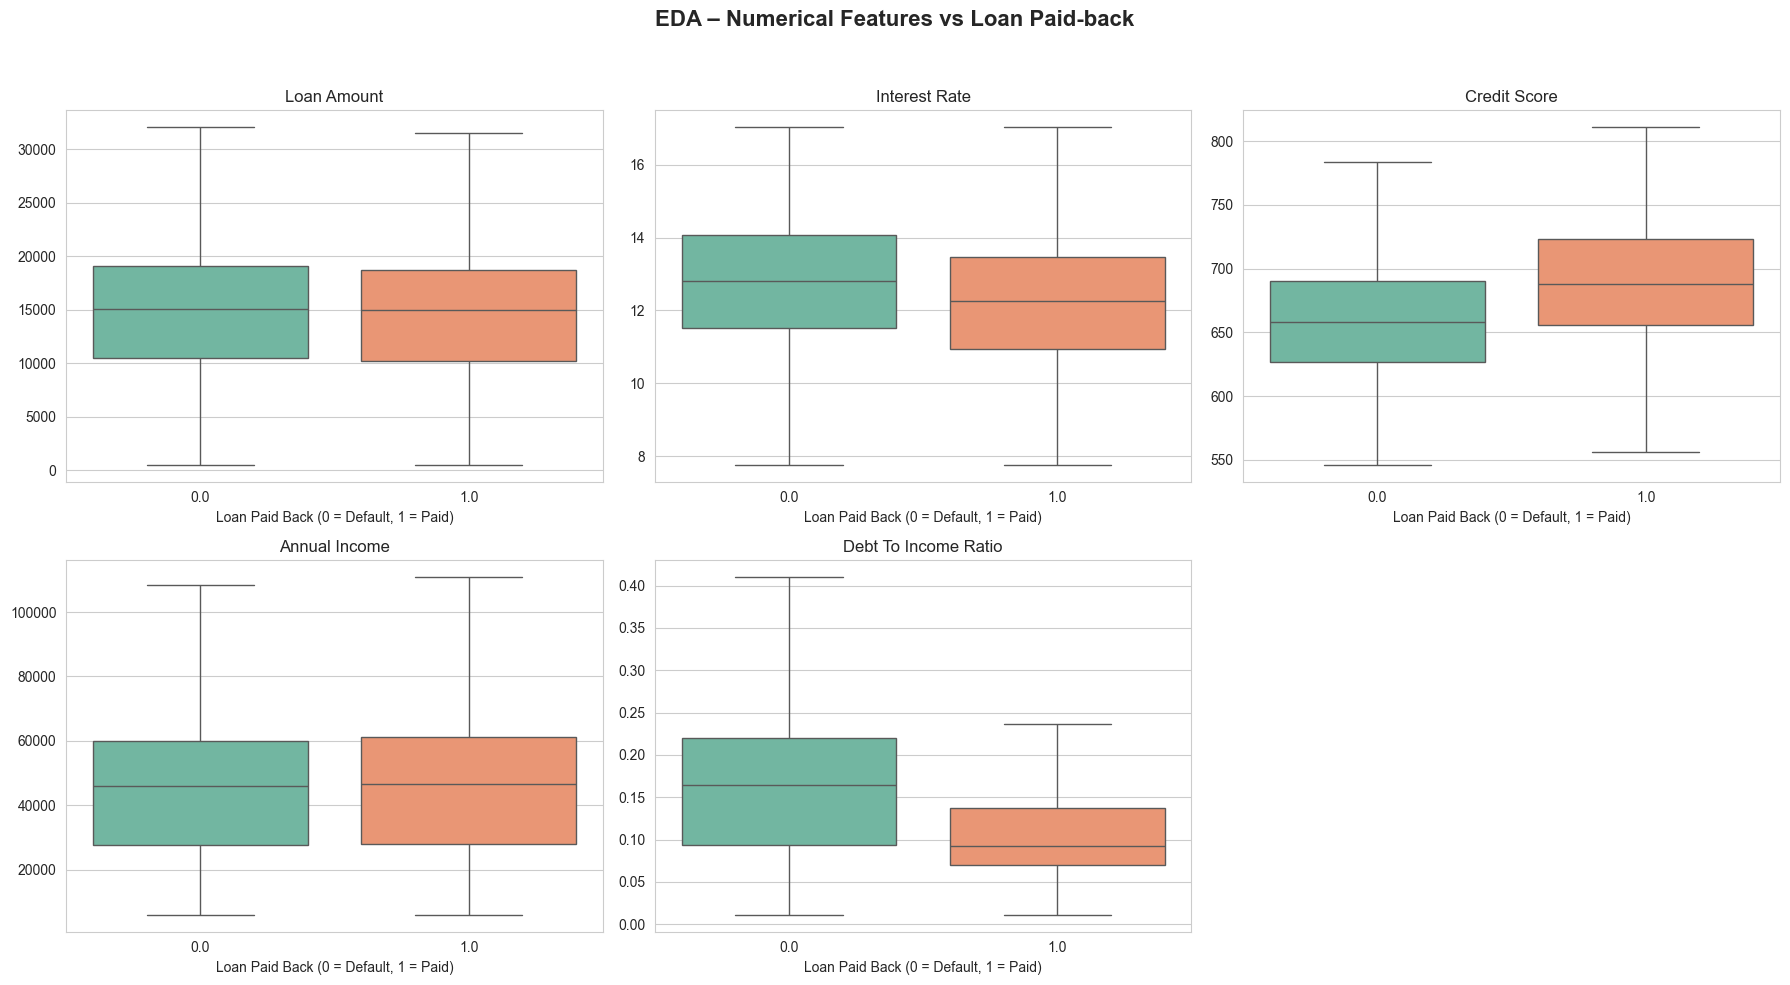

In [370]:
sns.set_style("whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for i, col in enumerate(num):
    sns.boxplot(
        data=df,
        x="loan_paid_back",
        y=col,
        ax=axes[i],
        palette="Set2",
        showfliers=False   # Ẩn outlier cho slide dễ nhìn
    )

    axes[i].set_title(col.replace("_", " ").title(), fontsize=12)
    axes[i].set_xlabel("Loan Paid Back (0 = Default, 1 = Paid)")
    axes[i].set_ylabel("")

# Tắt subplot thừa
for ax in axes[len(num):]:
    ax.axis("off")

plt.suptitle(
    "EDA – Numerical Features vs Loan Paid-back",
    fontsize=16,
    fontweight="bold"
)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Tổng kết lại sau khi EDA ta sẽ chỉ giữ những cột sau cat : employment_status, grade_grade, num : debt_to_income_ratio, credit_score, interest_rate

## 4. Feature engineer

In [10]:
df.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
5,5,44940.30,0.058,653,12159.92,12.24,Male,Single,Bachelor's,Employed,Other,D1,1.0


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   id                     593994 non-null  int64   
 1   annual_income          593994 non-null  float64 
 2   debt_to_income_ratio   593994 non-null  float64 
 3   credit_score           593994 non-null  int64   
 4   loan_amount            593994 non-null  float64 
 5   interest_rate          593994 non-null  float64 
 6   gender                 593994 non-null  object  
 7   marital_status         593994 non-null  object  
 8   education_level        593994 non-null  object  
 9   employment_status      593994 non-null  object  
 10  loan_purpose           593994 non-null  object  
 11  grade_subgrade         593994 non-null  object  
 12  loan_paid_back         593994 non-null  float64 
 13  DTI_bin                593994 non-null  category
 14  DTI_WOE             

Ở tại phần này là lúc mà toàn bộ tinh túy của EDA sẽ thể hiện nó không chỉ đơn thuần là xóa dữ liệu này xóa dữ liệu kia, nó không chỉ là phát hiện outline mà còn tìm pattern tìm liên kết giữa các feature, feature nào nên bỏ nên giữ lại, tạo feature mới, feature mới là gì 

Lúc này sẽ là lcus ta target những cột mà ta nên giữ :
- cat : employment_status, loan_purpose, grade_subgrade  
- num : debt_to_income_ratio, credit_score, interest_rate

Tạo feature

In [ ]:
def feature_engineering(df, is_train=True):
    # 1. Ratio / Burden features
    eps = 1e-6
    df["loan_to_income"] = df["loan_amount"] / (df["annual_income"] + eps)
    df["loan_per_credit"] = df["loan_amount"] / (df["credit_score"] + eps)
    # 2. Interest burden

    df["interest_burden"] = df["loan_amount"] * df["interest_rate"] / 100
    df["interest_income_ratio"] = (
        df["interest_burden"] / (df["annual_income"] + eps)
    )
    # 2. Grade risk mapping
    grade_risk_map = {
        'A1': 1.0, 'A2': 1.2, 'A3': 1.4, 'A4': 1.6, 'A5': 1.8,
        'B1': 2.0, 'B2': 2.2, 'B3': 2.4, 'B4': 2.6, 'B5': 2.8,
        'C1': 3.0, 'C2': 3.2, 'C3': 3.4, 'C4': 3.6, 'C5': 3.8,
        'D1': 4.0, 'D2': 4.2, 'D3': 4.4, 'D4': 4.6, 'D5': 4.8,
        'E1': 5.0, 'E2': 5.2, 'E3': 5.4, 'E4': 5.6, 'E5': 5.8,
        'F1': 6.0, 'F2': 6.2, 'F3': 6.4, 'F4': 6.6, 'F5': 6.8
    }
    df["grade_risk"] = df["grade_subgrade"].map(grade_risk_map)
    df["grade_risk"] = df["grade_risk"].astype("float32")
    purpose_map = {
        "Home": "low",
        "Business": "low",

        "Car": "medium",
        "Other": "medium",
        "Debt consolidation": "medium",
        "Vacation": "medium",

        "Education": "high",
        "Medical": "high"
    }
    df["loan_purpose_group"] = df["loan_purpose"].map(purpose_map)
    return df


In [345]:
df = feature_engineering(df)

In [135]:
num_feature1 = ['annual_income','loan_amount','debt_to_income_ratio','credit_score','interest_rate']
cat_feature1 = ["gender", "marital_status", "education_level", "employment_status", "loan_purpose","grade_subgrade"]

In [136]:
num_feature2 = ['debt_to_income_ratio','credit_score','interest_rate','loan_to_income','loan_per_credit','interest_income_ratio']
cat_label_feature2 = [ "employment_status", "grade_risk"]

In [354]:
num_features = [
    "annual_income",
    "debt_to_income_ratio",
    "credit_score",
    "loan_amount",
    "interest_rate",

    "loan_to_income",
    "interest_burden",
    "loan_per_credit",
    "interest_income_ratio",
    'grade_risk',
]

cat_onehot_features = ['employment_status', 'loan_purpose_group','education_level', 'marital_status']
base_features = ['gender_num']
features = num_features + cat_onehot_features + base_features
label = "loan_paid_back"

In [359]:
# preprocess pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split


# ===== Numeric transformer =====
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# ===== Categorical transformer =====
cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(
        handle_unknown="ignore",
        drop="first"
    ))
])

# ===== ColumnTransformer =====
preprocess = ColumnTransformer(
    transformers=[
        ("num", num_transformer, num_features),
        ("cat", cat_transformer, cat_onehot_features),
        ('base','passthrough',base_features)
    ],
    remainder="drop"
)



In [356]:
X = df[features]
y = df[label]

In [357]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [360]:
X_train = preprocess.fit_transform(X_train)
X_test = preprocess.transform(X_test)

## 5. Model

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


from lightgbm import LGBMClassifier



Logistics

In [364]:
log_reg = LogisticRegression(
    max_iter=1000,
    random_state=42
)
log_reg.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [365]:
log_reg_preds = log_reg.predict(X_test)

In [366]:
roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

0.9098327000892236

lgb

In [361]:
lgbm = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    metric="auc",
    n_estimators=1200,
    learning_rate=0.02,

    num_leaves=96,
    max_depth=-1,
    min_child_samples=200,

    subsample=0.75,
    subsample_freq=1,
    colsample_bytree=0.75,

    reg_alpha=0.1,
    reg_lambda=0.2,

    class_weight=None,   
    random_state=42,
    n_jobs=-1
)



lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 365227, number of negative: 91490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018034 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2339
[LightGBM] [Info] Number of data points in the train set: 456717, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799679 -> initscore=1.384289
[LightGBM] [Info] Start training from score 1.384289


,boosting_type,'gbdt'
,num_leaves,96
,max_depth,-1
,learning_rate,0.02
,n_estimators,1200
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,200


In [362]:
lgbm_pred = lgbm.predict(X_test)

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [363]:
roc_auc_score(y_test, lgbm.predict_proba(X_test)[:,1])

C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9217824774944243

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
X_sub, _, y_sub, _ = train_test_split(
    X_train, y_train,
    train_size=150_000,
    stratify=y_train,
    random_state=42
)

param_dist = {
    "num_leaves": [31, 63, 127],
    "max_depth": [-1, 6, 8],
    "min_child_samples": [50, 100],
    "subsample": [0.8, 0.9],
    "colsample_bytree": [0.8, 0.9],
    "learning_rate": [0.03, 0.05]
}


lgb = LGBMClassifier(
    objective="binary",
    metric="auc",
    n_estimators=600,       
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rs = RandomizedSearchCV(
    estimator=lgb,
    param_distributions=param_dist,
    n_iter=15,                
    scoring="roc_auc",
    cv=3,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

rs.fit(X_sub, y_sub)


In [ ]:
rs.best_score_
rs.best_params_


{'subsample': 0.9,
 'num_leaves': 31,
 'min_child_samples': 100,
 'max_depth': 6,
 'learning_rate': 0.03,
 'colsample_bytree': 0.8}

In [ ]:
lgb_final = LGBMClassifier(
    objective="binary",
    metric="auc",
    n_estimators=1200,       
    class_weight=None,
    random_state=42,
    n_jobs=-1,
    subsample=0.9,
    num_leaves=31,
    min_child_samples=100,
    max_depth=6,
    learning_rate=0.03,
    colsample_bytree=0.8,
    reg_alpha=0.1,
    reg_lambda=0.2,
)
lgbm = LGBMClassifier(
    objective="binary",
    boosting_type="gbdt",
    metric="auc",
    n_estimators=1200,
    learning_rate=0.03,

    num_leaves=31,
    max_depth=6,
    min_child_samples=100,

    subsample=0.9,
    subsample_freq=1,
    colsample_bytree=0.8,

    reg_alpha=0.1,
    reg_lambda=0.2,

    class_weight=None, 
    random_state=42,
    n_jobs=-1
)



lgbm.fit(X_train, y_train)

lgb_final.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 365227, number of negative: 91490
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2336
[LightGBM] [Info] Number of data points in the train set: 456717, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.799679 -> initscore=1.384289
[LightGBM] [Info] Start training from score 1.384289
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

KeyboardInterrupt: 

In [323]:
lgbm_y_pred = lgb_final.predict(X_test)


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [324]:
roc_auc = roc_auc_score(
    y_test,
    lgb_final.predict_proba(X_test)[:, 1]
)

roc_auc


C:\Users\Dell\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


0.9218097448892334

0.921736364679753 + purpose thường
0.9215916109977866 + purpose group
0.921688852272565 + education level
0.9217091834726456 + martial status
0.921560001658079 - education level
0.9218097448892334

0.9217094860872438
0.9218316336926173
0.9218316336926173

In [336]:
import joblib

joblib.dump(log_reg, "log_reg_model.pkl")
joblib.dump(lgbm, "lgbm_model.pkl")
joblib.dump(preprocess, "preprocessor.pkl")

['preprocessor.pkl']